

#  Global Electrification Outlook Dashboard

Source: World Bank (http://api.worldbank.org/v2/country/all/indicator/EG.ELC.ACCS.ZS)

In [9]:
import requests
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
from IPython.core.display import display, HTML

# Function to fetch data from World Bank API
def fetch_electrification_data():
    url = "http://api.worldbank.org/v2/country/all/indicator/EG.ELC.ACCS.ZS"
    params = {
        "format": "json",
        "date": "2000:2022",
        "per_page": 5000
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:
            records = data[1]
            df = pd.DataFrame.from_records(records)
            df = df[["countryiso3code", "country", "date", "value"]]
            df.columns = ["Country Code", "Country", "Year", "Electrification Rate (%)"]
            df["Year"] = df["Year"].astype(int)

            # Ensure the 'Country' column is a string, extracting the value if it's a dict
            df["Country"] = df["Country"].apply(lambda x: x["value"] if isinstance(x, dict) else str(x))

            return df
        else:
            print("No data available.")
            return None
    else:
        print("Failed to fetch data. Status code:", response.status_code)
        return None

# Fetch the data
electrification_data = fetch_electrification_data()

# Initialize Dash app
app = Dash(__name__)

# Layout with all three graphs visible without scrollbars
app.layout = html.Div([
    html.H1("Global Electrification Visualization"),

    # Dropdown for selecting countries
    html.Label("Select Countries:"),
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in electrification_data["Country"].unique()],
        value=["United States", "India"],  # Default selection
        multi=True
    ),

    # Range slider for selecting years
    html.Label("Select Year Range:"),
    dcc.RangeSlider(
        id="year-slider",
        min=electrification_data["Year"].min(),
        max=electrification_data["Year"].max(),
        value=[electrification_data["Year"].min(), electrification_data["Year"].max()],
        marks={int(year): str(year) for year in electrification_data["Year"].unique()},
        step=1,
    ),

    # Div for holding all charts in a flexible layout
    html.Div([
        # Line chart
        dcc.Graph(id="line-chart", style={'flex': '1', 'margin': '5px'}),

        # Bar chart
        dcc.Graph(id="bar-chart", style={'flex': '1', 'margin': '5px'}),

        # Map chart
        dcc.Graph(id="map-chart", style={'flex': '1', 'margin': '5px'})
    ], style={'display': 'flex', 'flex-direction': 'row', 'height': '60vh'})
], style={'height': '100vh', 'overflow': 'hidden', 'padding': '0 20px'})

# Callback for line chart
@app.callback(
    Output("line-chart", "figure"),
    Input("country-dropdown", "value"),
    Input("year-slider", "value")
)
def update_line_chart(selected_countries, year_range):
    filtered_data = electrification_data[
        (electrification_data["Country"].isin(selected_countries)) &
        (electrification_data["Year"] >= year_range[0]) &
        (electrification_data["Year"] <= year_range[1])
    ]
    fig = px.line(
        filtered_data,
        x="Year",
        y="Electrification Rate (%)",
        color="Country",
        title="Electrification Rate Over Time"
    )
    return fig

# Callback for bar chart
@app.callback(
    Output("bar-chart", "figure"),
    Input("year-slider", "value"),
    Input("country-dropdown", "value")
)
def update_bar_chart(selected_year, selected_countries):
    filtered_data = electrification_data[
        (electrification_data["Year"] == selected_year[1]) &  # Use end year
        (electrification_data["Country"].isin(selected_countries))
    ]
    fig = px.bar(
        filtered_data,
        x="Country",
        y="Electrification Rate (%)",
        title=f"Electrification Rate by Country in {selected_year[1]}"
    )
    return fig

# Callback for map chart
@app.callback(
    Output("map-chart", "figure"),
    Input("year-slider", "value")
)
def update_map(selected_year):
    filtered_data = electrification_data[electrification_data["Year"] == selected_year[1]]  # Use end year
    fig = px.choropleth(
        filtered_data,
        locations="Country Code",
        color="Electrification Rate (%)",
        hover_name="Country",
        title=f"Global Electrification Rate in {selected_year[1]}",
        color_continuous_scale="Viridis"
    )
    return fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)

# Maximize the output cell in Jupyter Notebook to avoid scrollbars
display(HTML("""
    <style>
        .output_area {
            max-height: none !important;
            overflow-y: hidden !important;
        }
    </style>
"""))

<IPython.core.display.Javascript object>

In [ ]:
# Sample Output

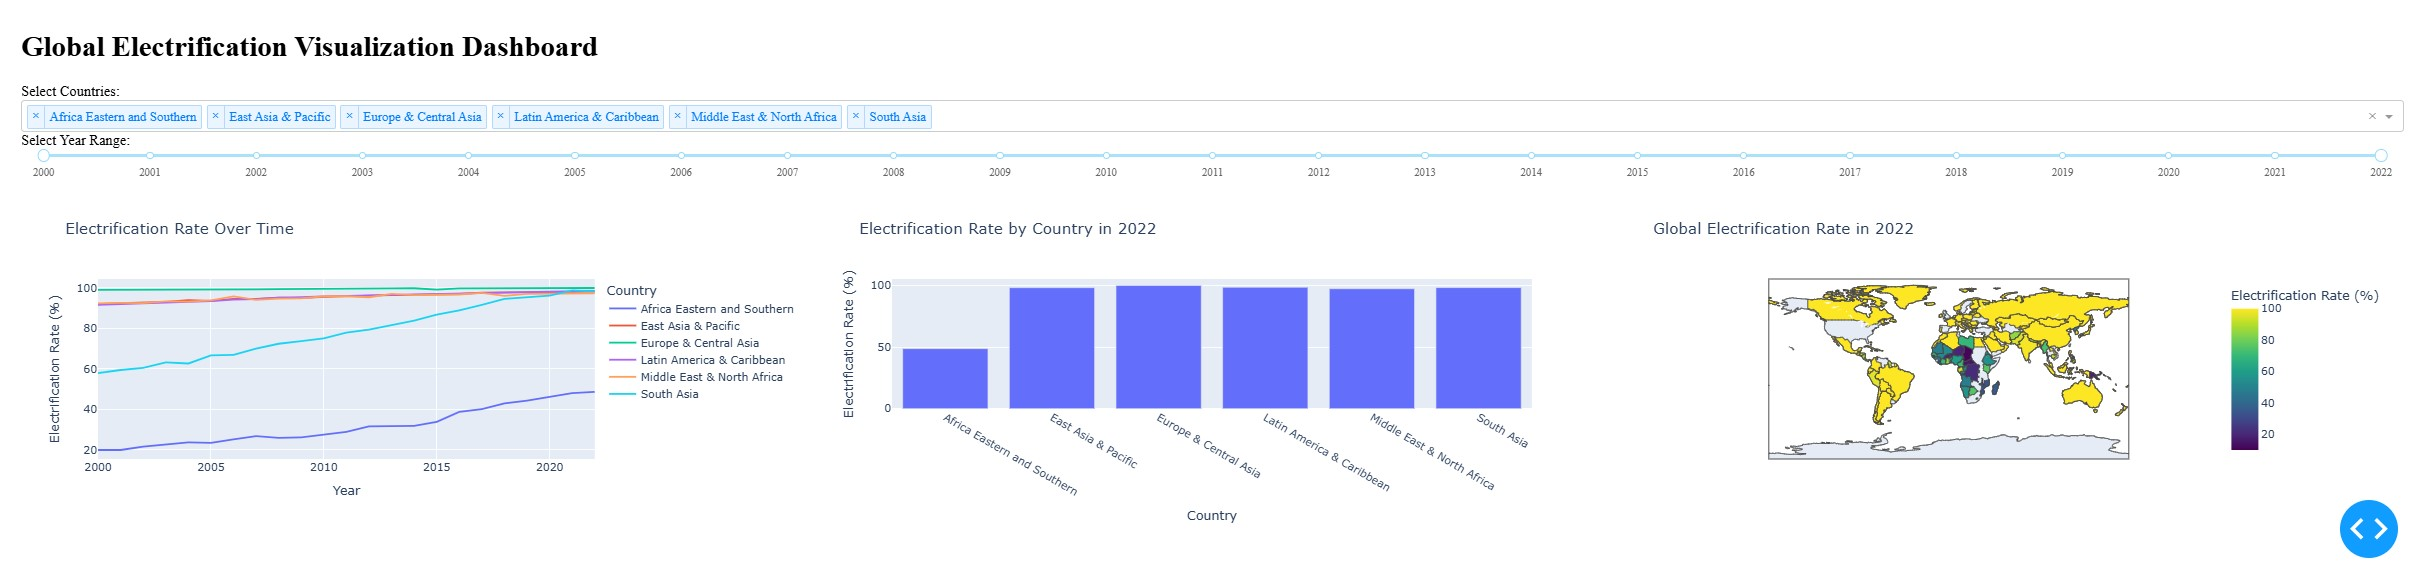

In [4]:
import requests
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Function to fetch data from World Bank API
def fetch_electrification_data():
    url = "http://api.worldbank.org/v2/country/all/indicator/EG.ELC.ACCS.ZS"
    params = {
        "format": "json",
        "date": "2000:2022",
        "per_page": 5000
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:
            records = data[1]
            df = pd.DataFrame.from_records(records)
            df = df[["countryiso3code", "country", "date", "value"]]
            df.columns = ["Country Code", "Country", "Year", "Electrification Rate (%)"]
            df["Year"] = df["Year"].astype(int)
            # Extract the country name from the dictionary-like structure in the 'Country' column
            df["Country"] = df["Country"].apply(lambda x: x["value"] if isinstance(x, dict) else x)
            return df
        else:
            print("No data available.")
            return None
    else:
        print("Failed to fetch data. Status code:", response.status_code)
        return None

# Fetch the data
electrification_data = fetch_electrification_data()

# Initialize Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Global Electrification Visualization Dashboard"),

    # Dropdown for selecting countries
    html.Label("Select Countries:"),
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in electrification_data["Country"].unique()],
        value=["United States", "India"],  # Default selection
        multi=True
    ),

    # Range slider for selecting years
    html.Label("Select Year Range:"),
    dcc.RangeSlider(
        id="year-slider",
        min=electrification_data["Year"].min(),
        max=electrification_data["Year"].max(),
        value=[electrification_data["Year"].min(), electrification_data["Year"].max()],
        marks={int(year): str(year) for year in electrification_data["Year"].unique()},
        step=1,
    ),

    # Line chart
    dcc.Graph(id="line-chart"),

    # Year slider for bar chart
    html.Label("Select Year for Comparison:"),
    dcc.Slider(
        id="year-slider-bar",
        min=electrification_data["Year"].min(),
        max=electrification_data["Year"].max(),
        value=electrification_data["Year"].max(),
        marks={int(year): str(year) for year in electrification_data["Year"].unique()},
        step=1,
    ),
    dcc.Graph(id="bar-chart"),

    # World map
    html.Label("Select Year for Map:"),
    dcc.Slider(
        id="year-slider-map",
        min=electrification_data["Year"].min(),
        max=electrification_data["Year"].max(),
        value=electrification_data["Year"].max(),
        marks={int(year): str(year) for year in electrification_data["Year"].unique()},
        step=1,
    ),
    dcc.Graph(id="map-chart"),
])

# Line chart callback
@app.callback(
    Output("line-chart", "figure"),
    Input("country-dropdown", "value"),
    Input("year-slider", "value")
)
def update_line_chart(selected_countries, year_range):
    filtered_data = electrification_data[
        (electrification_data["Country"].isin(selected_countries)) &
        (electrification_data["Year"] >= year_range[0]) &
        (electrification_data["Year"] <= year_range[1])
    ]
    fig = px.line(
        filtered_data,
        x="Year",
        y="Electrification Rate (%)",
        color="Country",
        title="Electrification Rate Over Time"
    )
    return fig

# Bar chart callback
@app.callback(
    Output("bar-chart", "figure"),
    Input("year-slider-bar", "value"),
    Input("country-dropdown", "value")
)
def update_bar_chart(selected_year, selected_countries):
    filtered_data = electrification_data[
        (electrification_data["Year"] == selected_year) &
        (electrification_data["Country"].isin(selected_countries))
    ]
    fig = px.bar(
        filtered_data,
        x="Country",
        y="Electrification Rate (%)",
        title=f"Electrification Rate by Country in {selected_year}"
    )
    return fig

# Map chart callback
@app.callback(
    Output("map-chart", "figure"),
    Input("year-slider-map", "value")
)
def update_map(selected_year):
    filtered_data = electrification_data[electrification_data["Year"] == selected_year]
    fig = px.choropleth(
        filtered_data,
        locations="Country Code",
        color="Electrification Rate (%)",
        hover_name="Country",
        title=f"Global Electrification Rate in {selected_year}",
        color_continuous_scale="Viridis"
    )
    return fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
!pip install jupyter-dash